# Model Comparison

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
df = pd.read_csv('housing.csv')

## Exploratory Data Analysis

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data Cleaning

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [ ]:
(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']] % 1 == 0).all()

,0
longitude,False
latitude,False
housing_median_age,True
total_rooms,True
total_bedrooms,True
population,True
households,True
median_income,False
median_house_value,True


In [ ]:
cols_to_convert = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [ ]:
df = df[df['ocean_proximity'] != 'ISLAND']

print(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64


## Splitting Data into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14657,-117.15,32.78,25,1577,266,611,284,5.2500,NEAR OCEAN,205100
11986,-117.51,34.02,24,7779,1835,3996,1765,2.1764,INLAND,135300
12670,-121.46,38.48,8,3593,659,1710,530,3.5227,INLAND,93100
9549,-120.84,37.43,32,2892,521,1580,484,3.7784,INLAND,164500
6099,-117.88,34.11,30,3082,602,2008,619,4.1411,<1H OCEAN,182700
...,...,...,...,...,...,...,...,...,...,...
6134,-118.00,34.07,34,1696,456,1609,426,2.2500,INLAND,138500
19348,-122.85,38.62,16,4418,704,1908,697,4.5913,<1H OCEAN,244600
1855,-124.22,41.73,28,3003,699,1530,653,1.7038,NEAR OCEAN,78300
740,-122.13,37.67,40,1748,318,914,317,3.8676,NEAR BAY,184000


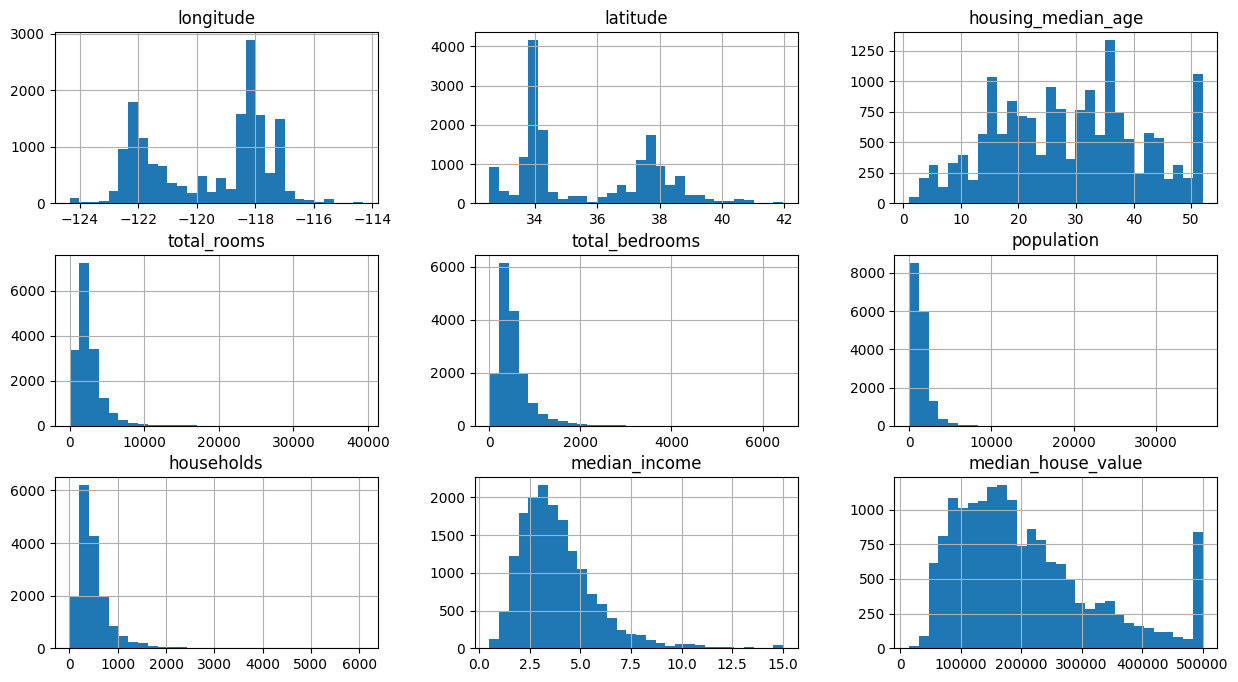

In [ ]:
train_data.hist(figsize=(15, 8), bins=30)
plt.show()

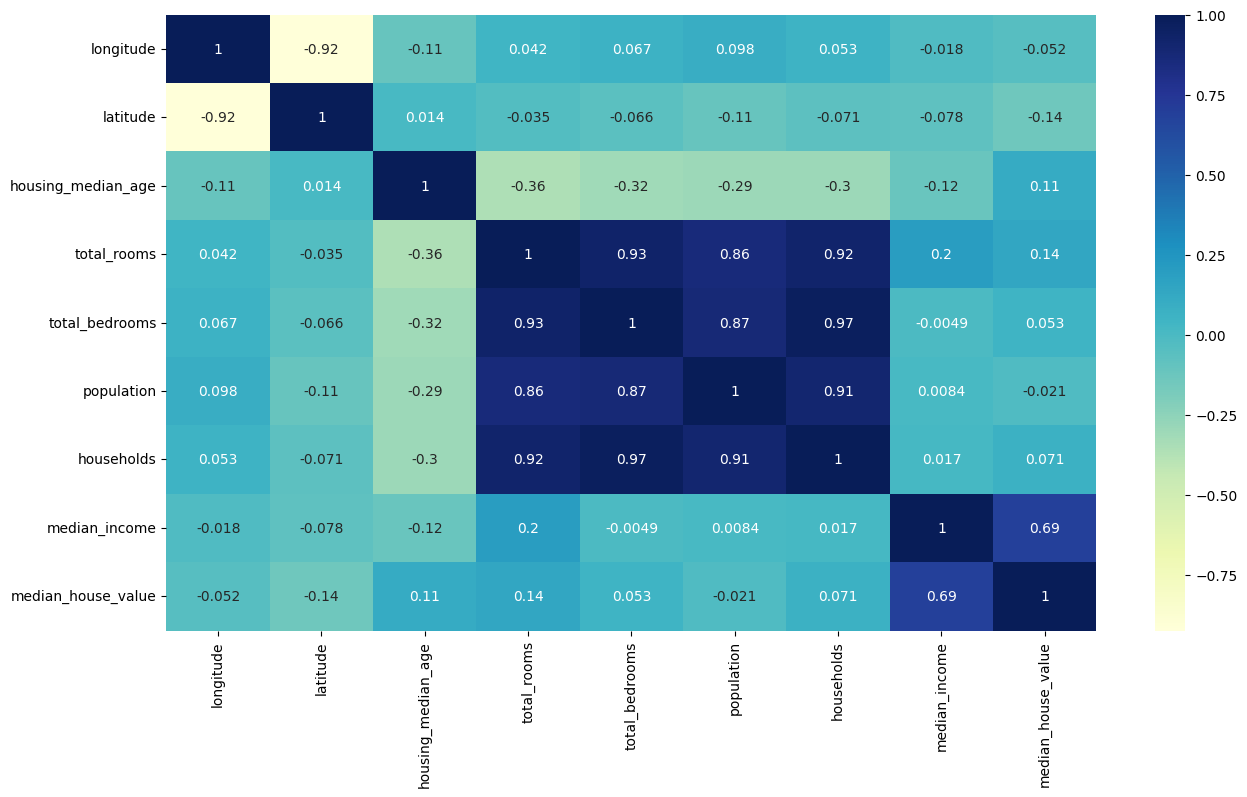

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(columns=["ocean_proximity"]).corr(), annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

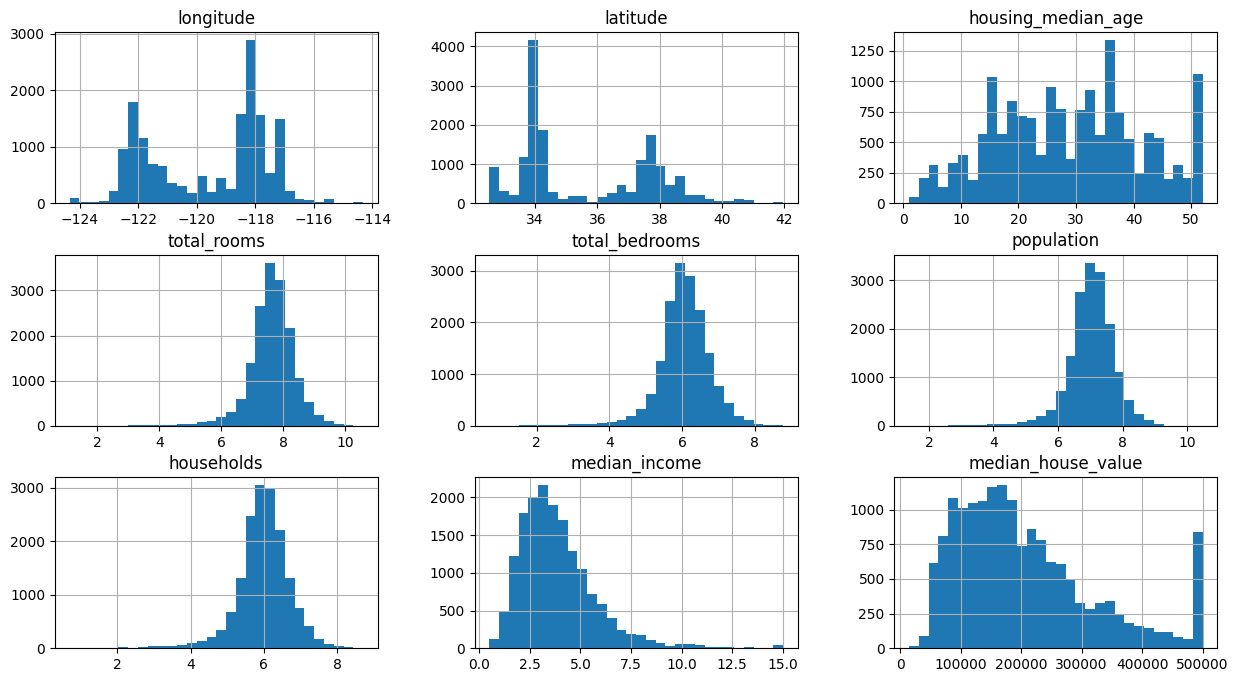

In [ ]:
train_data.hist(figsize=(15, 8), bins=30)
plt.show()

## One-Hot Encoding

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

In [ ]:
train_data['income_cat'] = pd.cut(
    train_data['median_income'],
    bins=[-np.inf, 1.5, 3.0, 4.5, np.inf],
    labels=['very_low', 'low', 'medium', 'high']
)
train_data = train_data.join(pd.get_dummies(train_data['income_cat'], prefix='income', drop_first=True))
train_data = train_data.drop(columns=['income_cat'])

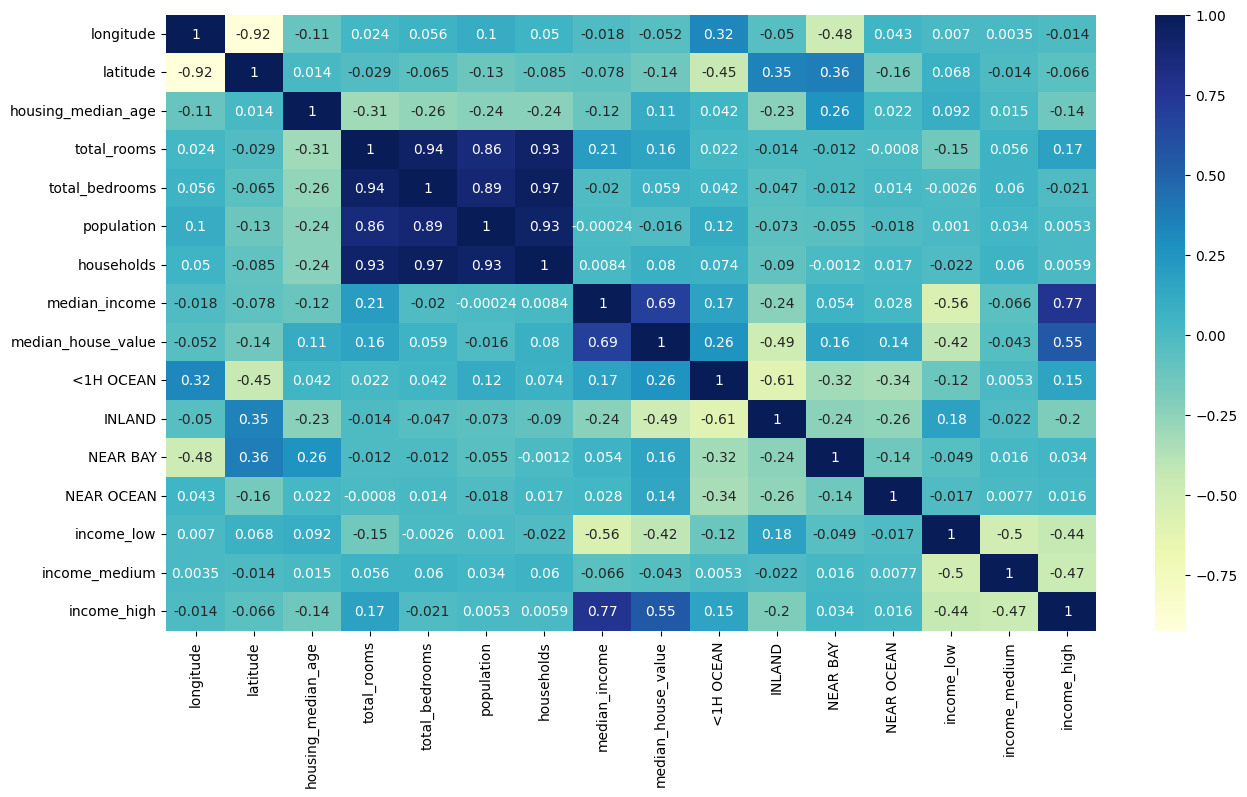

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

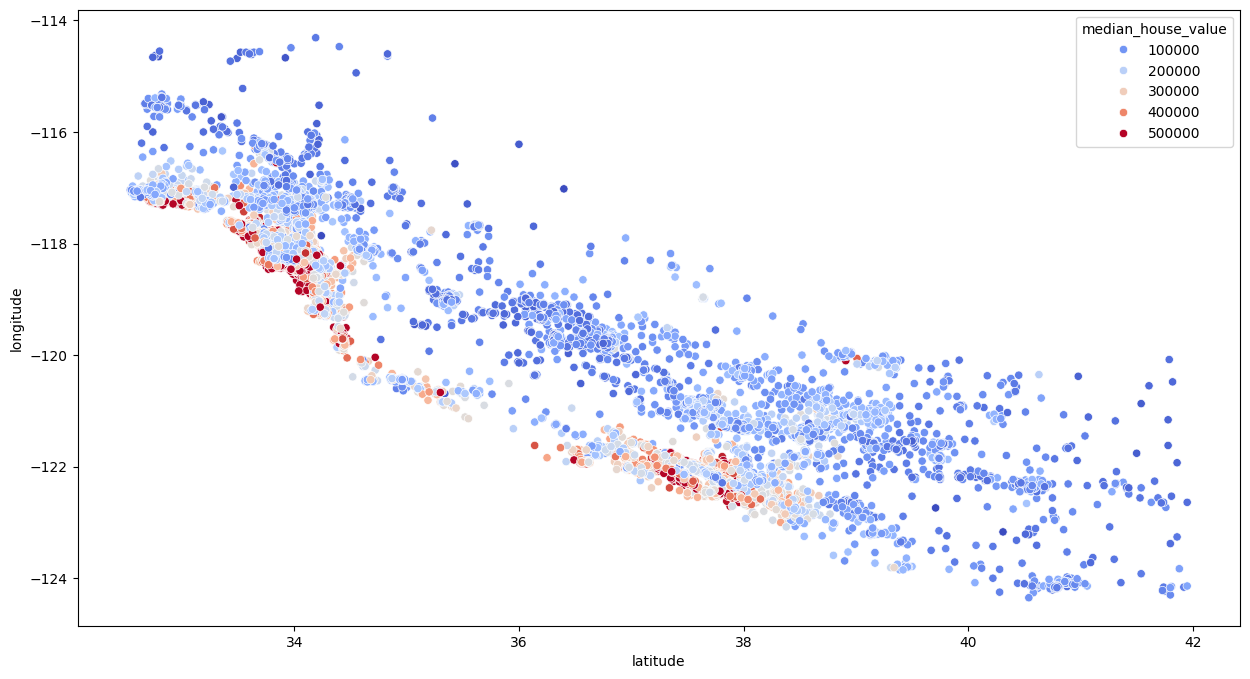

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm')
plt.show()

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

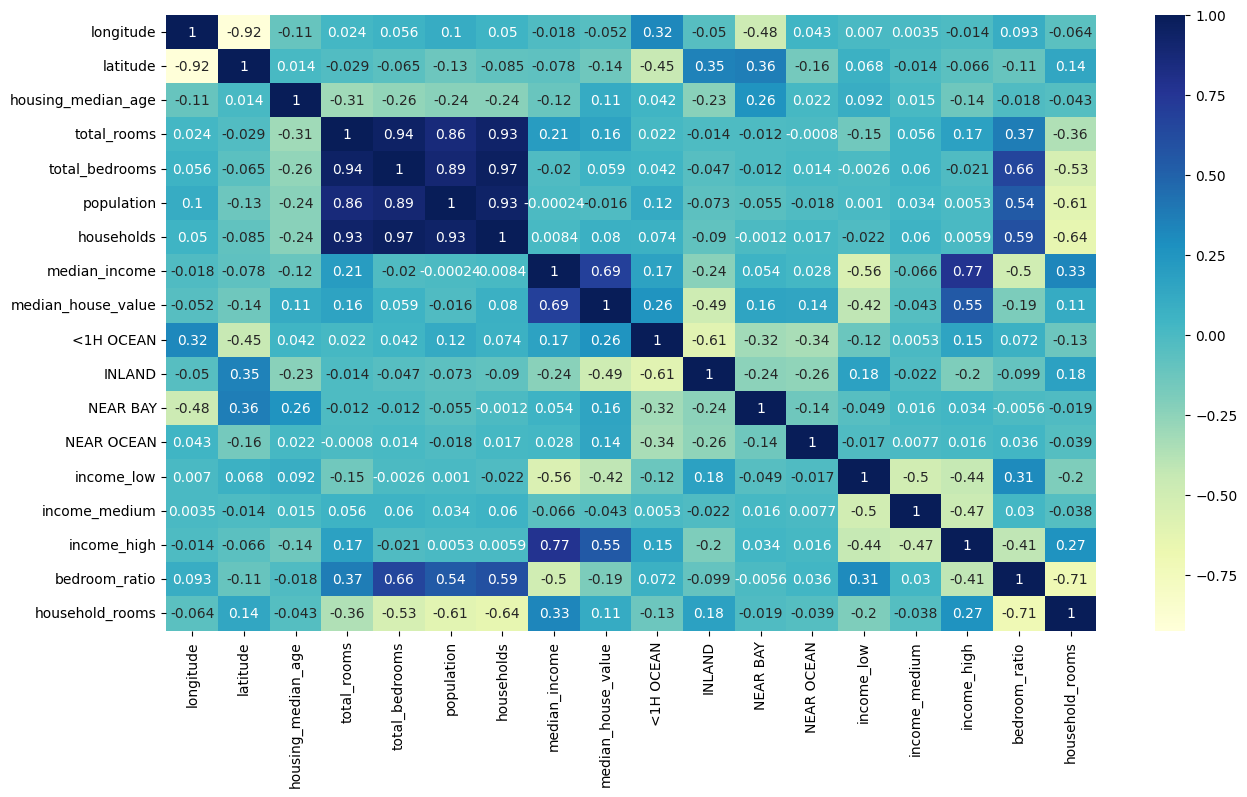

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

## Training the Models

In [ ]:
test_data = x_test.join(y_test)

# Log-transform skewed features
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    test_data[col] = np.log(test_data[col] + 1)

In [ ]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

In [ ]:
test_data['income_cat'] = pd.cut(
    test_data['median_income'],
    bins=[-np.inf, 1.5, 3.0, 4.5, np.inf],
    labels=['very_low', 'low', 'medium', 'high']
)
test_data = test_data.join(pd.get_dummies(test_data['income_cat'], prefix='income', drop_first=True))
test_data = test_data.drop(columns=['income_cat'])

In [ ]:
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [ ]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [ ]:
x_test_s = scaler.transform(x_test)

## Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

## Evaluating Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = {}

for name, model in models.items():
    print(f"\nTraining {name}")
    print("-" * len(name))

    if name == "Linear Regression":
        model.fit(x_train_s, y_train)          # scaled data
        y_pred = model.predict(x_test_s)
    else:
        model.fit(x_train, y_train)            # raw data
        y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

    print(f"{name} Result")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²   : {r2:.4f}")


Training Linear Regression
-----------------
Linear Regression Result
MAE : 48794.98
RMSE: 68129.54
R²   : 0.6577

Training Decision Tree
-------------
Decision Tree Result
MAE : 44080.35
RMSE: 69715.70
R²   : 0.6415

Training Random Forest
-------------
Random Forest Result
MAE : 32380.77
RMSE: 51267.69
R²   : 0.8061


## Visualization

### Performance of all Models across Metrics

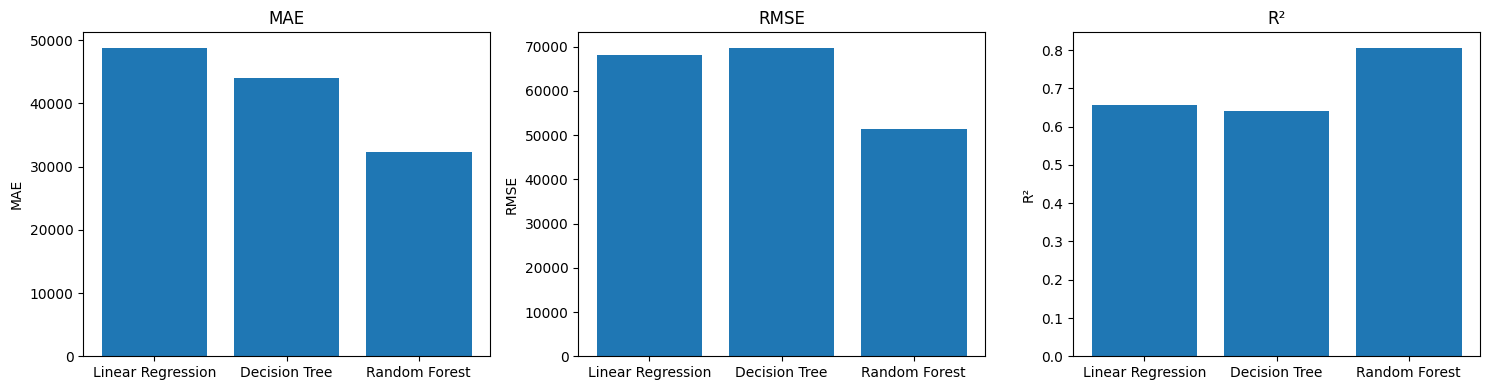

In [ ]:
metrics = ["MAE", "RMSE", "R²"]

fig, axes = plt.subplots(1, 3, figsize=(15,4))

for i, metric in enumerate(metrics):
    axes[i].bar(results.keys(), [results[m][metric] for m in results])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

### Predicted vs Actual Values for Best Model

In [ ]:
best_model_name = max(results, key=lambda m: results[m]["R²"])
best_model = models[best_model_name]
if best_model_name == "Linear Regression":
    y_best_pred = best_model.predict(x_test_s)
else:
    y_best_pred = best_model.predict(x_test)

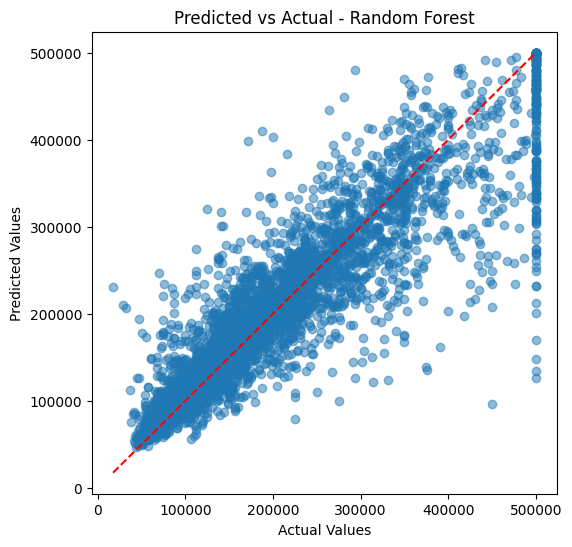

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs Actual - {best_model_name}")
plt.show()

## Reflection  

1. **Which model performed best, and why do you think so?**

   The **Random Forest Regressor** performed best with the highest R² score (0.80) and the lowest MAE/RMSE compared to Linear Regression (0.65) and Decision Tree (0.64). This suggests Random Forest captures non-linear patterns and complex feature interactions more effectively than the other two models.  

2. **What trade-offs did you notice (speed vs accuracy vs interpretability)?**  
- **Linear Regression** → fastest, simplest to interpret, but lower accuracy due to linear assumptions.  
- **Decision Tree** → interpretable, captures some non-linearity, but prone to overfitting and underperformed vs Random Forest.  
- **Random Forest** → most accurate and robust, but slower and less interpretable due to ensemble complexity.  

3. **How could you improve the models further?**  
- Perform **hyperparameter tuning** (e.g., `max_depth`, `n_estimators`, `min_samples_split`) for Decision Trees and Random Forest.  
- Use **regularization** techniques (Ridge, Lasso) for Linear Regression.  
- Explore **boosting models** like XGBoost, LightGBM, or CatBoost for potentially higher accuracy.  